In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [71]:
data = pd.read_pickle('HPCC_benchmark_results/MultinomialNB-hpcc_results.tsv.gz')
data.head()

,Dataset_Name,Method_Name,Test_Score,alpha,fit_prior
0,soybean,MultinomialNB,0.726744,0.25,True
1,soybean,MultinomialNB,0.761628,0.25,True
2,soybean,MultinomialNB,0.732558,0.25,True
3,soybean,MultinomialNB,0.732558,0.25,True
4,soybean,MultinomialNB,0.720930,0.25,True


# Get unique dataset names

In [72]:
data_sets = pd.unique(data.Dataset_Name.ravel())
#data_sets

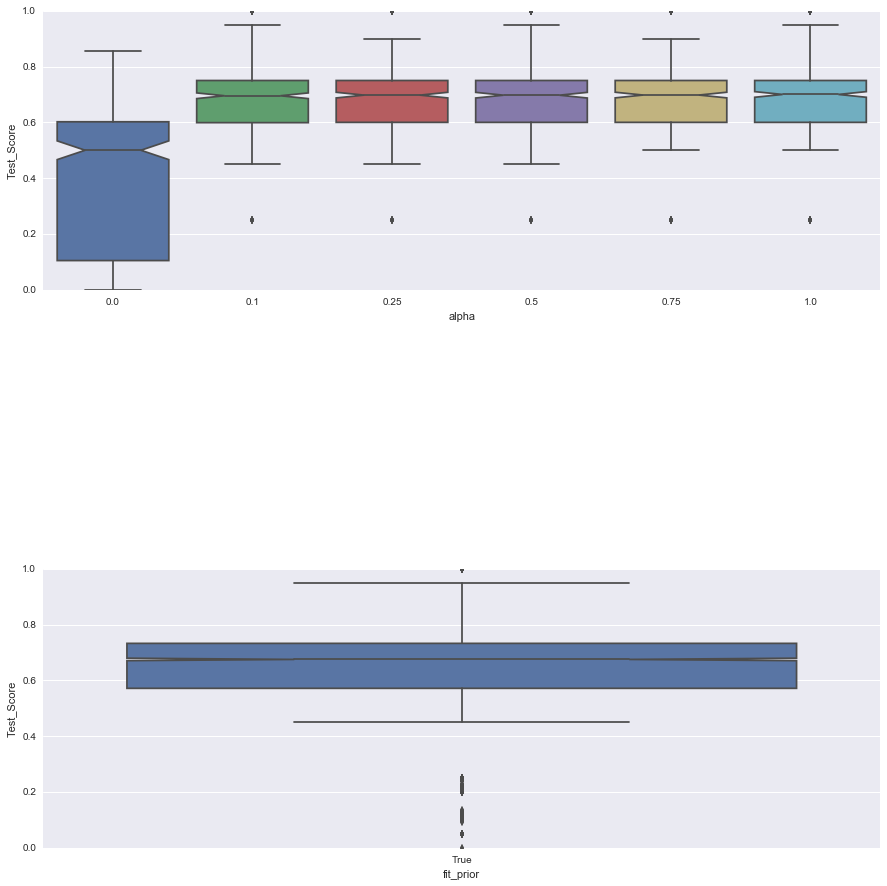

In [73]:
%matplotlib inline
sb.set()
fig, axs = plt.subplots(2,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sb.boxplot(data=data, x='alpha', y='Test_Score', notch = True, ax=axs[0])
sb.boxplot(data=data, x='fit_prior', y='Test_Score', notch = True, ax=axs[1])

In [74]:
fit_p = pd.unique(data.fit_prior.ravel()) #Does not use False at all??
fit_p

array(['True'], dtype=object)

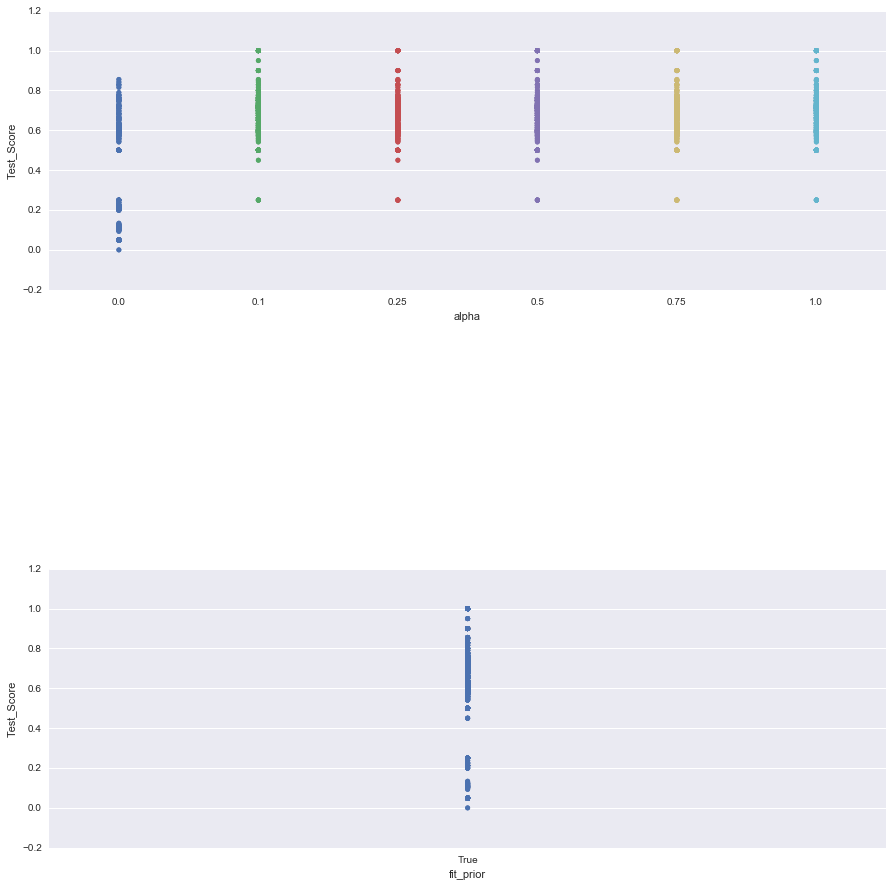

In [75]:
sb.set(style="white", color_codes=True)
sb.set()
fig, axs = plt.subplots(2,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sb.stripplot(x="alpha", y="Test_Score", data=data, ax=axs[0])
sb.stripplot(x="fit_prior", y="Test_Score", data=data, ax=axs[1])

# Linear Regression Analysis on Combined Dataset

In [76]:
dummies = pd.get_dummies(data.fit_prior) #this is done to get an integer value for string type parameters 
data = data.join(dummies);

In [100]:
data = data.rename(columns={'True':'True_Param'})

# Analyse the data using jointplot

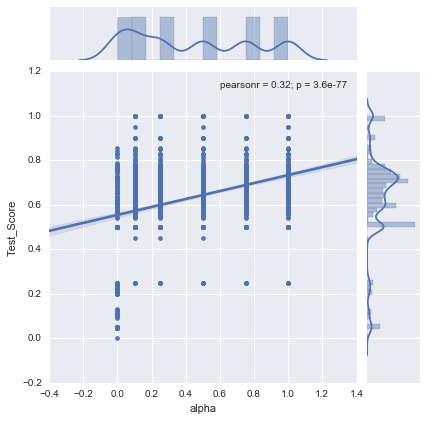

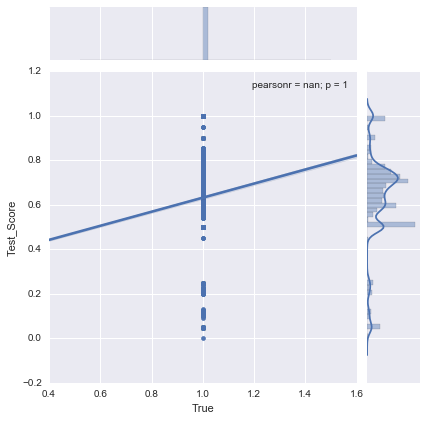

In [67]:

plt.figure()
sb.jointplot(data=data, kind='reg', x='alpha', y='Test_Score')

plt.figure()
sb.jointplot(data=data, kind='reg', x='True', y='Test_Score')

# Analyse LR in detail

In [101]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
alpha = smf.ols(formula='Test_Score ~ alpha', data=data).fit()
T = smf.ols(formula='Test_Score ~ True_Param', data=data).fit() #??????????????
# print the coefficients
alpha.params
T.params

Intercept     0.315913
True_Param    0.315913
dtype: float64

In [105]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'alpha': [0.25]})
X_new_T = pd.DataFrame({'True_Param': [1]})
X_new.head()
X_new_T.head()

,True_Param
0,1


In [106]:
# use the model to make predictions on a new value
alpha.predict(X_new)
T.predict(X_new_T)

array([ 0.63182507])

In [107]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'alpha': [data.alpha.min(), data.alpha.max()]})
X_new.head()
X_new_T = pd.DataFrame({'True_Param': [data.True_Param.min(), data.True_Param.max()]})
X_new_T.head()

,True_Param
0,1
1,1


In [108]:
# make predictions for those x values and store them
preds_alpha = alpha.predict(X_new)
preds_alpha
preds_T = T.predict(X_new_T)
preds_T

array([ 0.63182507,  0.63182507])

In [109]:
# print the confidence intervals for the model coefficients
alpha.conf_int()
# print the confidence intervals for the model coefficients
T.conf_int()

,0,1
Intercept,0.312468,0.319358
True_Param,0.312468,0.319358


In [110]:
# print the p-values for the model coefficients
alpha.pvalues
T.pvalues

Intercept     0
True_Param    0
dtype: float64

In [111]:
# print the R-squared value for the model
alpha.rsquared
T.rsquared

-2.2204460492503131e-16

# Fit a LM using both the parameters

In [112]:
# create a fitted model with all two features
lm = smf.ols(formula='Test_Score ~ alpha + True_Param + alpha * True_Param', data=data).fit()

# print the coefficients
lm.params

Intercept           0.277121
alpha               0.089518
True_Param          0.277121
alpha:True_Param    0.089518
dtype: float64

In [113]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     364.9
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           3.57e-77
Time:                        23:32:12   Log-Likelihood:                 790.34
No. Observations:                3240   AIC:                            -1577.
Df Residuals:                    3238   BIC:                            -1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.2771      0.003    105.509      0.000         0.272     0.282
alpha                0.0895      0.005     19.103      0.000         0.080     0.099
True_Param           0.2771      0.003    105.509      0.000         0.272     0.282
alpha:True_Param     0.0895      0.005     19.103      0.000         0.080     0.099
==============================================================================
Omnibus:                      305.492   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.639
Skew:                          -0.741   Prob(JB):                     4.16e-95
Kurtosis:                       4.012   Cond. No.                     1.08e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Fit LM with only alpha

In [114]:
# create a fitted model with all two features
lm = smf.ols(formula='Test_Score ~ alpha', data=data).fit()

# print the coefficients
lm.params

Intercept    0.554242
alpha        0.179037
dtype: float64

In [115]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     364.9
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           3.57e-77
Time:                        23:38:56   Log-Likelihood:                 790.34
No. Observations:                3240   AIC:                            -1577.
Df Residuals:                    3238   BIC:                            -1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5542      0.005    105.509      0.000         0.544     0.565
alpha          0.1790      0.009     19.103      0.000         0.161     0.197
==============================================================================
Omnibus:                      305.492   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.639
Skew:                          -0.741   Prob(JB):                     4.16e-95
Kurtosis:                       4.012   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Fit LM with only fit_prior

In [116]:
# create a fitted model with all two features
lm = smf.ols(formula='Test_Score ~ True_Param', data=data).fit()

# print the coefficients
lm.params

Intercept     0.315913
True_Param    0.315913
dtype: float64

In [117]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 23 Mar 2016   Prob (F-statistic):                nan
Time:                        23:40:05   Log-Likelihood:                 617.34
No. Observations:                3240   AIC:                            -1233.
Df Residuals:                    3239   BIC:                            -1227.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3159      0.002    179.799      0.000         0.312     0.319
True_Param     0.3159      0.002    179.799      0.000         0.312     0.319
==============================================================================
Omnibus:                      600.266   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.672
Skew:                          -1.119   Prob(JB):                    4.57e-254
Kurtosis:                       4.906   Cond. No.                     7.09e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Conclusion  - alpha is a much more important feature than fit_prior

# Separate the data based on different datasets 

In [122]:
datasetNames_list = data['Dataset_Name'].unique().tolist()
datasetNames_list

['soybean',
 'hypothyroid',
 'shuttle-landing-control',
 'pima',
 'sponge',
 'solar-flare_1',
 'cars1',
 'heart-c',
 'trains']

In [124]:
datasetWiseData = {}
for name in datasetNames_list:
    datasetWiseData[name] = data[(data.Dataset_Name == name)]

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


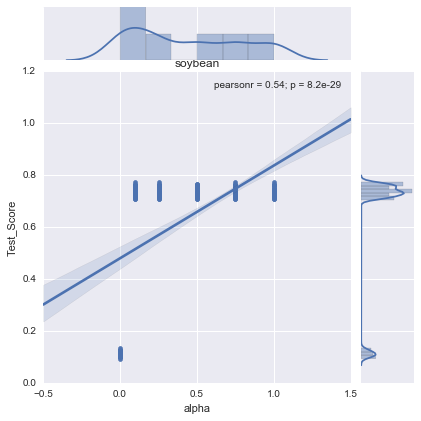

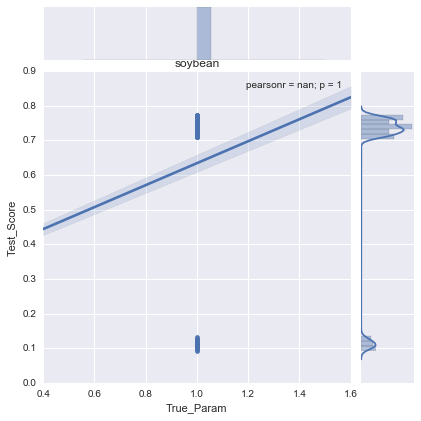

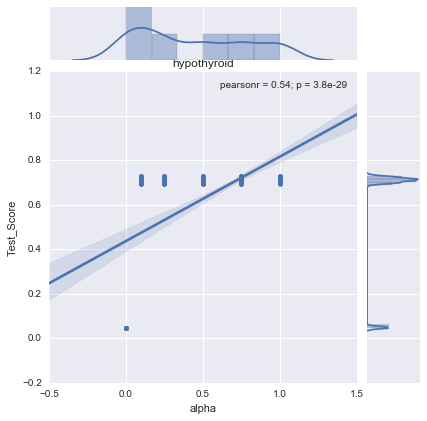

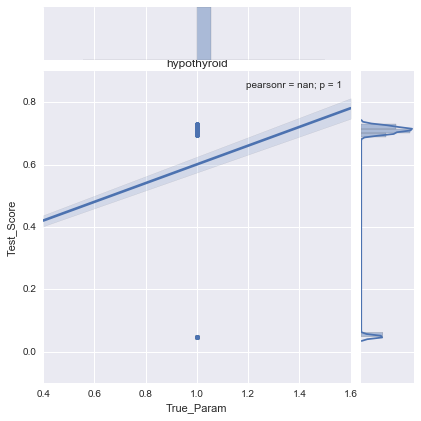

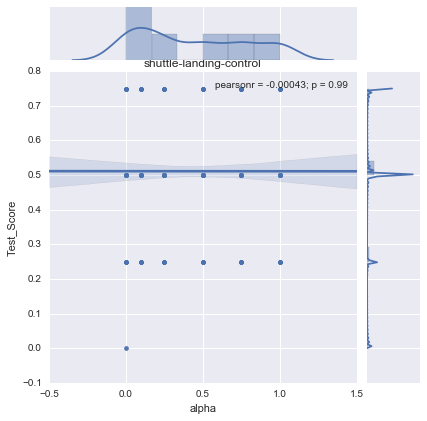

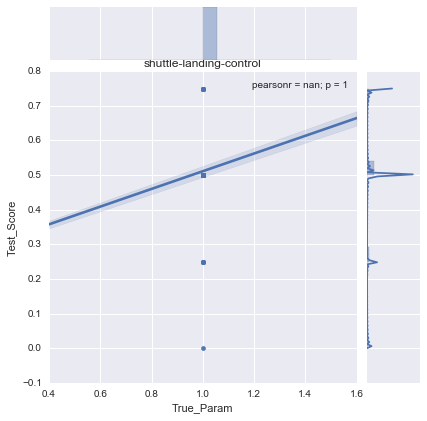

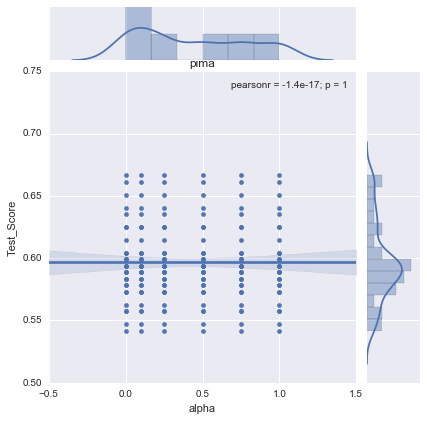

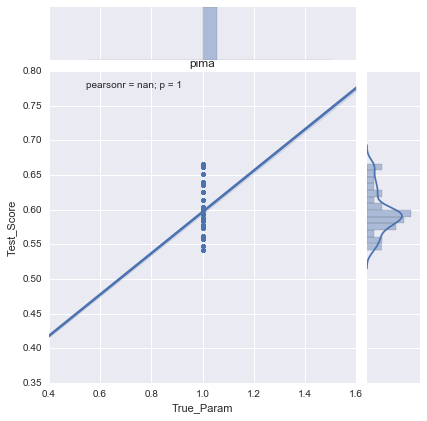

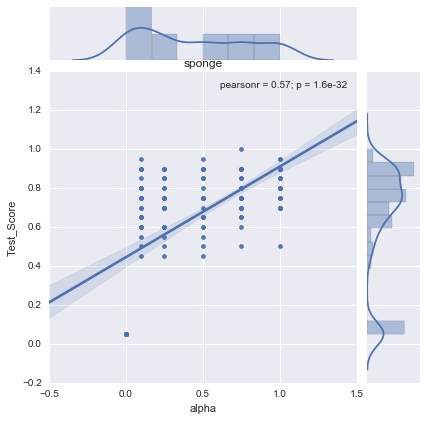

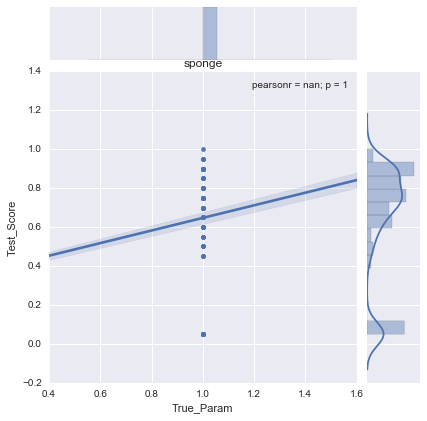

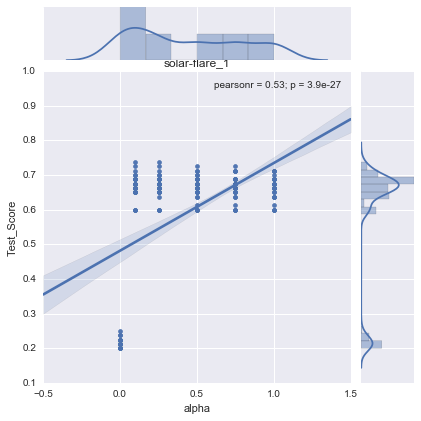

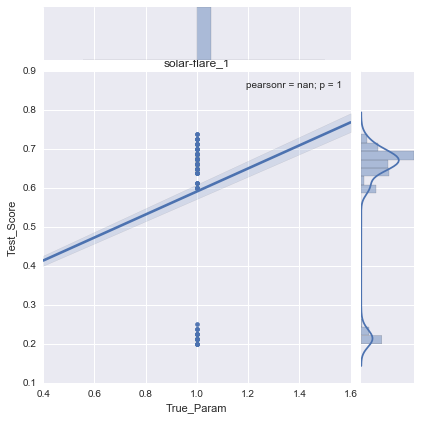

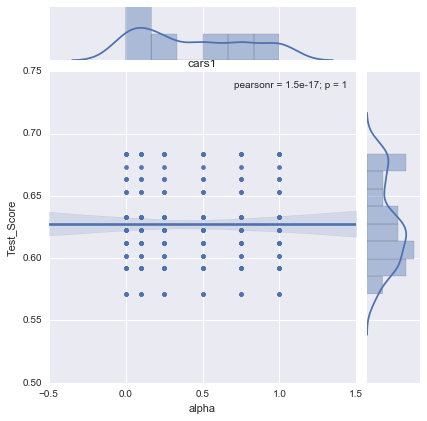

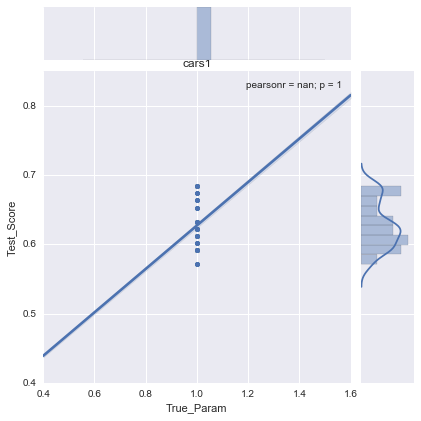

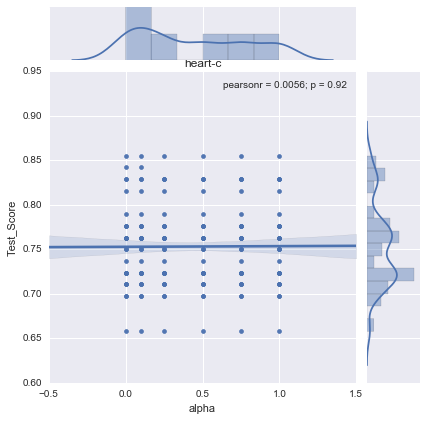

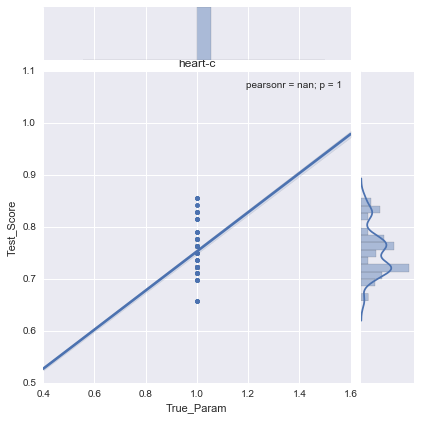

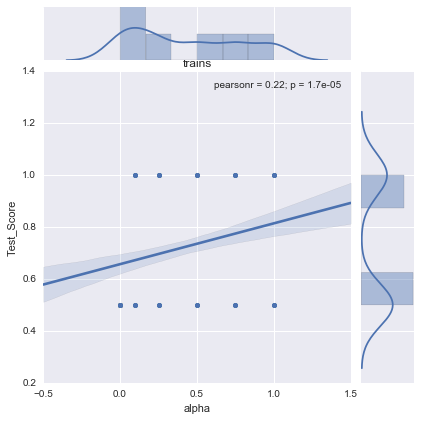

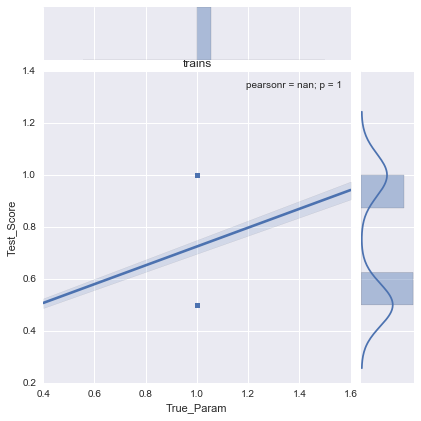

In [136]:
for name in datasetNames_list:
    gb = datasetWiseData[name]
    plt.figure()
    sb.jointplot(data=gb, kind='reg', x='alpha', y='Test_Score')
    plt.title(name, fontsize=12 )
    plt.figure()
    sb.jointplot(data=gb, kind='reg', x='True_Param', y='Test_Score')
    plt.title(name, fontsize=12 )